SYNTHETIC DATASET GENERATION FOR NEURAL NETWORK

Generating NEW RANDOM dataset with:
  - Total samples: 2000
  - Features: 4 (REDUCED FROM 10)
  - Classes: 5

Dataset shape: (2000, 4)
Labels shape: (2000,)
Classes distribution:
  Class 0: 400 samples (20.0%)
  Class 1: 400 samples (20.0%)
  Class 2: 400 samples (20.0%)
  Class 3: 400 samples (20.0%)
  Class 4: 400 samples (20.0%)

Visualizing dataset...


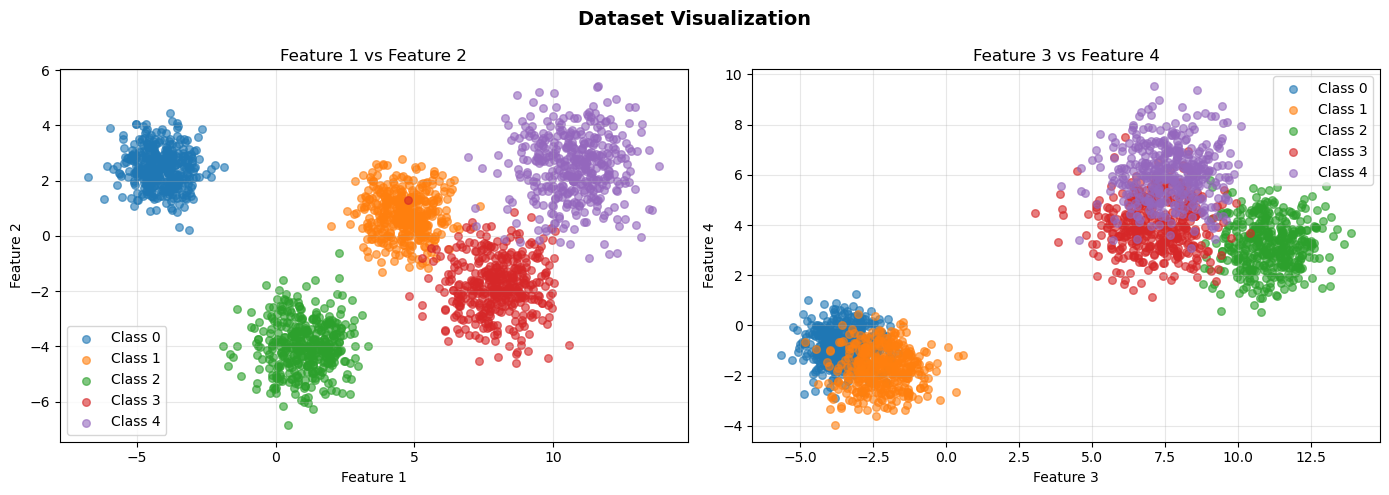


Preparing data for neural network training...

Data splits:
  Training set:   1400 samples (70.0%)
  Validation set: 200 samples (10.0%)
  Test set:       400 samples (20.0%)

Feature statistics after standardization:
  Training set mean: -0.0000, std: 1.0000
  Training set range: [-2.54, 2.39]

One-hot encoded labels shape:
  y_train: (1400, 5)
  y_val:   (200, 5)
  y_test:  (400, 5)

Example of one-hot encoding:
  Original label: 1
  One-hot:        [0. 1. 0. 0. 0.]

SAVING DATASET

Dataset saved to 'synthetic_dataset.npz'

To load the dataset later, use:
  data = np.load('synthetic_dataset.npz')
  X_train = data['X_train']
  y_train_onehot = data['y_train_onehot']
  # etc...

DATASET READY FOR NEURAL NETWORK TRAINING!

Sample training data (first 5 samples):
 Feature_1  Feature_2  Feature_3  Feature_4  True_Class
 -0.220924   0.753242  -0.880948  -1.226089           1
  0.130403   0.230514  -1.098181  -1.305899           1
  0.006802   0.612896  -1.189831  -1.163766           1
 -1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Set random seed for NEW random generation
np.random.seed(np.random.randint(0, 10000))

def generate_synthetic_dataset(n_samples=2000, n_features=4, n_classes=5):
    """
    Generate a synthetic dataset for multi-class classification
    
    Parameters:
    - n_samples: Total number of samples to generate
    - n_features: Number of input features
    - n_classes: Number of distinct classes (default: 5)
    
    Returns:
    - X: Feature matrix of shape (n_samples, n_features)
    - y: Label vector of shape (n_samples,)
    """
    
    samples_per_class = n_samples // n_classes
    X = []
    y = []
    
    # Generate data for each class with distinct characteristics
    for class_id in range(n_classes):
        # Create cluster centers for each class
        # Each class has a different mean and covariance structure
        mean = np.random.randn(n_features) * 3 + class_id * 2
        
        # Create covariance matrix with some correlation
        cov = np.eye(n_features) * (0.5 + class_id * 0.2)
        
        # Add some random correlation between features
        for i in range(n_features):
            for j in range(i+1, n_features):
                if np.random.rand() > 0.7:
                    cov[i, j] = cov[j, i] = np.random.rand() * 0.3
        
        # Generate samples from multivariate normal distribution
        class_samples = np.random.multivariate_normal(mean, cov, samples_per_class)
        
        X.append(class_samples)
        y.append(np.full(samples_per_class, class_id))
    
    # Combine all classes
    X = np.vstack(X)
    y = np.concatenate(y)
    
    # Shuffle the dataset
    indices = np.random.permutation(len(X))
    X = X[indices]
    y = y[indices]
    
    return X, y


def visualize_dataset(X, y, title="Dataset Visualization"):
    """
    Visualize the dataset with multiple feature pairs
    """
    n_features = X.shape[1]
    
    if n_features >= 2:
        fig, axes = plt.subplots(1, 2, figsize=(14, 5))
        
        # Plot Feature 1 vs Feature 2
        for class_id in range(5):
            mask = y == class_id
            axes[0].scatter(X[mask, 0], X[mask, 1], 
                       label=f'Class {class_id}', 
                       alpha=0.6, 
                       s=30)
        axes[0].set_xlabel('Feature 1')
        axes[0].set_ylabel('Feature 2')
        axes[0].set_title('Feature 1 vs Feature 2')
        axes[0].legend()
        axes[0].grid(True, alpha=0.3)
        
        if n_features >= 4:
            # Plot Feature 3 vs Feature 4
            for class_id in range(5):
                mask = y == class_id
                axes[1].scatter(X[mask, 2], X[mask, 3], 
                           label=f'Class {class_id}', 
                           alpha=0.6, 
                           s=30)
            axes[1].set_xlabel('Feature 3')
            axes[1].set_ylabel('Feature 4')
            axes[1].set_title('Feature 3 vs Feature 4')
            axes[1].legend()
            axes[1].grid(True, alpha=0.3)
        
        plt.suptitle(title, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()


def prepare_data_for_nn(X, y, test_size=0.2, validation_size=0.1):
    """
    Prepare data for neural network training
    
    Returns:
    - X_train, X_val, X_test: Standardized feature matrices
    - y_train, y_val, y_test: One-hot encoded labels
    - scaler: Fitted StandardScaler object
    """
    
    # First split: separate test set
    X_temp, X_test, y_temp, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42, stratify=y
    )
    
    # Second split: separate validation set from training
    val_size_adjusted = validation_size / (1 - test_size)
    X_train, X_val, y_train, y_val = train_test_split(
        X_temp, y_temp, test_size=val_size_adjusted, random_state=42, stratify=y_temp
    )
    
    # Standardize features (fit on training data only)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_val = scaler.transform(X_val)
    X_test = scaler.transform(X_test)
    
    # Convert labels to one-hot encoding
    def one_hot_encode(labels, n_classes=5):
        one_hot = np.zeros((len(labels), n_classes))
        one_hot[np.arange(len(labels)), labels.astype(int)] = 1
        return one_hot
    
    y_train_onehot = one_hot_encode(y_train)
    y_val_onehot = one_hot_encode(y_val)
    y_test_onehot = one_hot_encode(y_test)
    
    return (X_train, X_val, X_test, 
            y_train_onehot, y_val_onehot, y_test_onehot,
            y_train, y_val, y_test,  # Original labels for evaluation
            scaler)


# ==================== MAIN EXECUTION ====================

print("=" * 60)
print("SYNTHETIC DATASET GENERATION FOR NEURAL NETWORK")
print("=" * 60)

# Generate the dataset with 4 features
n_samples = 2000
n_features = 4  # REDUCED TO 4 FEATURES
n_classes = 5

print(f"\nGenerating NEW RANDOM dataset with:")
print(f"  - Total samples: {n_samples}")
print(f"  - Features: {n_features} (REDUCED FROM 10)")
print(f"  - Classes: {n_classes}")

X, y = generate_synthetic_dataset(n_samples, n_features, n_classes)

print(f"\nDataset shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"Classes distribution:")
for i in range(n_classes):
    count = np.sum(y == i)
    print(f"  Class {i}: {count} samples ({count/len(y)*100:.1f}%)")

# Visualize the dataset
print("\nVisualizing dataset...")
visualize_dataset(X, y)

# Prepare data for neural network
print("\nPreparing data for neural network training...")
(X_train, X_val, X_test, 
 y_train_onehot, y_val_onehot, y_test_onehot,
 y_train, y_val, y_test,
 scaler) = prepare_data_for_nn(X, y)

print("\nData splits:")
print(f"  Training set:   {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"  Validation set: {X_val.shape[0]} samples ({X_val.shape[0]/len(X)*100:.1f}%)")
print(f"  Test set:       {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

print("\nFeature statistics after standardization:")
print(f"  Training set mean: {X_train.mean():.4f}, std: {X_train.std():.4f}")
print(f"  Training set range: [{X_train.min():.2f}, {X_train.max():.2f}]")

print("\nOne-hot encoded labels shape:")
print(f"  y_train: {y_train_onehot.shape}")
print(f"  y_val:   {y_val_onehot.shape}")
print(f"  y_test:  {y_test_onehot.shape}")

print("\nExample of one-hot encoding:")
print(f"  Original label: {y_train[0]}")
print(f"  One-hot:        {y_train_onehot[0]}")

# Save the dataset
print("\n" + "=" * 60)
print("SAVING DATASET")
print("=" * 60)

np.savez('synthetic_dataset.npz',
         X_train=X_train, X_val=X_val, X_test=X_test,
         y_train_onehot=y_train_onehot, y_val_onehot=y_val_onehot, y_test_onehot=y_test_onehot,
         y_train=y_train, y_val=y_val, y_test=y_test)

print("\nDataset saved to 'synthetic_dataset.npz'")
print("\nTo load the dataset later, use:")
print("  data = np.load('synthetic_dataset.npz')")
print("  X_train = data['X_train']")
print("  y_train_onehot = data['y_train_onehot']")
print("  # etc...")

print("\n" + "=" * 60)
print("DATASET READY FOR NEURAL NETWORK TRAINING!")
print("=" * 60)

# Display sample data
print("\nSample training data (first 5 samples):")
df_sample = pd.DataFrame(X_train[:5], columns=[f'Feature_{i+1}' for i in range(n_features)])
df_sample['True_Class'] = y_train[:5]
print(df_sample.to_string(index=False))

print("\nDataset generation complete! You can now use this data to train your neural network.")
print("Note: This is a NEW RANDOM dataset with 4 features instead of 10.")

In [5]:
import numpy as np
import pandas as pd

print("=" * 60)
print("CONVERTING NPZ FILE TO CSV FORMAT")
print("=" * 60)

# Load the .npz file
data = np.load('synthetic_dataset.npz')

print("\nLoading 'synthetic_dataset.npz'...")
print(f"Available arrays: {list(data.keys())}")

# Extract the data
X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']
y_train = data['y_train']  # Original labels (not one-hot)
y_val = data['y_val']
y_test = data['y_test']

print(f"\nData shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_val:   {X_val.shape}")
print(f"  X_test:  {X_test.shape}")

# Create column names for features (automatically detects number of features)
n_features = X_train.shape[1]
feature_columns = [f'Feature_{i+1}' for i in range(n_features)]
print(f"\nDetected {n_features} features")

# ==================== OPTION 1: Separate CSV files ====================
print("\n" + "=" * 60)
print("OPTION 1: Saving as separate CSV files")
print("=" * 60)

# Training set
df_train = pd.DataFrame(X_train, columns=feature_columns)
df_train['Class'] = y_train
df_train.to_csv('train_data.csv', index=False)
print(f"✓ Saved: train_data.csv ({df_train.shape[0]} rows, {df_train.shape[1]} columns)")

# Validation set
df_val = pd.DataFrame(X_val, columns=feature_columns)
df_val['Class'] = y_val
df_val.to_csv('validation_data.csv', index=False)
print(f"✓ Saved: validation_data.csv ({df_val.shape[0]} rows, {df_val.shape[1]} columns)")

# Test set
df_test = pd.DataFrame(X_test, columns=feature_columns)
df_test['Class'] = y_test
df_test.to_csv('test_data.csv', index=False)
print(f"✓ Saved: test_data.csv ({df_test.shape[0]} rows, {df_test.shape[1]} columns)")

# ==================== OPTION 2: Single combined CSV file ====================
print("\n" + "=" * 60)
print("OPTION 2: Saving as single combined CSV file")
print("=" * 60)

# Add a 'Split' column to identify which set each sample belongs to
df_train['Split'] = 'train'
df_val['Split'] = 'validation'
df_test['Split'] = 'test'

# Combine all data
df_combined = pd.concat([df_train, df_val, df_test], ignore_index=True)
df_combined.to_csv('complete_dataset.csv', index=False)
print(f"✓ Saved: complete_dataset.csv ({df_combined.shape[0]} rows, {df_combined.shape[1]} columns)")

# ==================== Display sample data ====================
print("\n" + "=" * 60)
print("SAMPLE DATA FROM TRAINING SET")
print("=" * 60)
print(df_train.head(10).to_string(index=False))

print("\n" + "=" * 60)
print("CLASS DISTRIBUTION")
print("=" * 60)
print("\nTraining set:")
print(df_train['Class'].value_counts().sort_index())
print("\nValidation set:")
print(df_val['Class'].value_counts().sort_index())
print("\nTest set:")
print(df_test['Class'].value_counts().sort_index())

# ==================== Summary ====================
print("\n" + "=" * 60)
print("CONVERSION COMPLETE!")
print("=" * 60)
print("\nFiles created:")
print("  1. train_data.csv        - Training data only")
print("  2. validation_data.csv   - Validation data only")
print("  3. test_data.csv         - Test data only")
print("  4. complete_dataset.csv  - All data with 'Split' column")

print(f"\nEach file has {n_features} features + 1 Class column")

print("\nTo load CSV files back in Python:")
print("  import pandas as pd")
print("  df_train = pd.read_csv('train_data.csv')")
print("  X_train = df_train.drop('Class', axis=1).values")
print("  y_train = df_train['Class'].values")

print("\nNote: These CSV files contain the standardized features")
print("      and original class labels (0-4), not one-hot encoded.")
print("\n" + "=" * 60)

CONVERTING NPZ FILE TO CSV FORMAT

Loading 'synthetic_dataset.npz'...
Available arrays: ['X_train', 'X_val', 'X_test', 'y_train_onehot', 'y_val_onehot', 'y_test_onehot', 'y_train', 'y_val', 'y_test']

Data shapes:
  X_train: (1400, 4)
  X_val:   (200, 4)
  X_test:  (400, 4)

Detected 4 features

OPTION 1: Saving as separate CSV files
✓ Saved: train_data.csv (1400 rows, 5 columns)
✓ Saved: validation_data.csv (200 rows, 5 columns)
✓ Saved: test_data.csv (400 rows, 5 columns)

OPTION 2: Saving as single combined CSV file
✓ Saved: complete_dataset.csv (2000 rows, 6 columns)

SAMPLE DATA FROM TRAINING SET
 Feature_1  Feature_2  Feature_3  Feature_4  Class Split
 -0.220924   0.753242  -0.880948  -1.226089      1 train
  0.130403   0.230514  -1.098181  -1.305899      1 train
  0.006802   0.612896  -1.189831  -1.163766      1 train
 -1.410543   0.824026  -1.267050  -0.867673      0 train
  1.212439   0.833859   0.837552   1.244978      4 train
  0.034003   0.784243  -1.180287  -1.024866      